In [1]:
from datetime import datetime, timedelta
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns
from util_functions import s_coordinate_4



/home/mspydell/models/PFM_root/PFM/driver/../sdpm_py_util/ocn_functions.py:24: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [2]:
lvl='3'
ocnfuns.mk_LV2_BC_dict(lvl)



OCN_LV2_BC dict loaded with pickle
OCN_LV 3 _BC dict saved with pickle to:  /scratch/PFM_Simulations/LV3_Forecast/Forc/test_BC_LV3.pkl


In [3]:

fn_in = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_BC_LV3.pkl'
fn_out = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_BC_LV3.nc'

ocnfuns.ocn_roms_BC_dict_to_netcdf_pckl(fn_in,fn_out)



OCN_BC dict loaded with pickle

max and min of data in ROMS BC file (iz is bottom [0] to top [39]):
max zeta_north =  0.701 m          at  ( it, ilon)     =  ( 55, 218)
min zeta_north = -0.419 m          at  ( it, ilon)     =  ( 48, 152)
max zeta_south =  0.753 m          at  ( it, ilon)     =  ( 54, 250)
min zeta_south = -0.407 m          at  ( it, ilon)     =  ( 24, 182)
max zeta_west  =  0.721 m          at  ( it, ilat)     =  ( 54,  26)
min zeta_west  = -0.394 m          at  ( it, ilat)     =  ( 48, 377)
max ubar_north =  0.067 m/s        at  ( it, ilon)     =  ( 48, 248)
min ubar_north = -0.059 m/s        at  ( it, ilon)     =  ( 42, 216)
max ubar_south =  0.081 m/s        at  ( it, ilon)     =  ( 11, 102)
min ubar_south = -0.136 m/s        at  ( it, ilon)     =  ( 54, 135)
max ubar_west  =  0.059 m/s        at  ( it, ilat)     =  ( 17, 320)
min ubar_west  = -0.064 m/s        at  ( it, ilat)     =  ( 23, 146)
max vbar_north =  0.405 m/s        at  ( it, ilon)     =  ( 46, 236)
min

In [ ]:

lvl='3'
ocnfuns.mk_LV2_IC_dict(lvl)

fn_in = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_IC_LV3.pkl'
fn_out = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_IC_LV3.nc'

ocnfuns.ocn_roms_IC_dict_to_netcdf_pckl(fn_in,fn_out)



In [ ]:

lvl='2'
ocnfuns.mk_LV2_IC_dict(lvl)

fn_in = '/scratch/PFM_Simulations/LV2_Forecast/Forc/test_IC_LV2.pkl'
fn_out = '/scratch/PFM_Simulations/LV2_Forecast/Forc/test_IC_LV2.nc'

ocnfuns.ocn_roms_IC_dict_to_netcdf_pckl(fn_in,fn_out)

In [5]:

bclv1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_BC.nc')
bclv2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/LV2_OCEAN_BC.nc')
bclv3 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC.nc')
#bclv3_v2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/test_BC_LV3.nc')

iclv3 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_IC.nc')
iclv2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/LV2_OCEAN_IC.nc')
iclv1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_IC.nc')

atm3 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_ATM_FORCING.nc')
atm2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/LV2_ATM_FORCING.nc')
atm1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')

#iclv2_v2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/test_IC_LV2.nc')
#iclv3_v2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/test_IC_LV3.nc')

bclv1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_BC.nc')
ic1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_IC.nc')
#f = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')


ic2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/ocean_rst_LV1_20172018_01.nc')
bc2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/BC_LV1_20181201_20200930_smooth.nc')

grd1 = netCDF4.Dataset('/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV1_rx020_hmask.nc')
grd2 = netCDF4.Dataset('/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV2_rx020.nc')
grd3 = netCDF4.Dataset('/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV3_rx020.nc')

#his = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/His/LV3_ocean_his_202409081200.nc')

print(iclv3.variables['ocean_time'][:])
print(bclv3.variables['ocean_time'][:])
print(atm3.variables['ocean_time'][:])
print(iclv2.variables['ocean_time'][:])
print(bclv2.variables['ocean_time'][:])
print(atm2.variables['ocean_time'][:])
print(iclv1.variables['ocean_time'][:])
print(bclv1.variables['ocean_time'][:])
print(atm1.variables['ocean_time'][:])



t0 = datetime(1999,1,1)
tatm = t0 + timedelta(days=9377.5)
print(tatm)

[9378.5]
[9378.5        9378.54166667 9378.58333333 9378.625      9378.66666667
 9378.70833333 9378.75       9378.79166667 9378.83333333 9378.875
 9378.91666667 9378.95833333 9379.         9379.04166667 9379.08333333
 9379.125      9379.16666667 9379.20833333 9379.25       9379.29166667
 9379.33333333 9379.375      9379.41666667 9379.45833333 9379.5
 9379.54166667 9379.58333333 9379.625      9379.66666667 9379.70833333
 9379.75       9379.79166667 9379.83333333 9379.875      9379.91666667
 9379.95833333 9380.         9380.04166667 9380.08333333 9380.125
 9380.16666667 9380.20833333 9380.25       9380.29166667 9380.33333333
 9380.375      9380.41666667 9380.45833333 9380.5        9380.54166667
 9380.58333333 9380.625      9380.66666667 9380.70833333 9380.75
 9380.79166667 9380.83333333 9380.875      9380.91666667 9380.95833333
 9381.        ]
[9378.5   9378.625 9378.75  9378.875 9379.    9379.125 9379.25  9379.375
 9379.5   9379.625 9379.75  9379.875 9380.    9380.125 9380.25  9380.375


In [5]:
hraw = None
hb = 50.0
th_b = 3.0
th_s = 8.0
Tcl = 50.0
Nz = 40
zrom1 = s_coordinate_4(grd1.variables['h'][:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv1.variables['zeta'][0,:,:])
zrom2 = s_coordinate_4(grd2.variables['h'][:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv2.variables['zeta'][0,:,:])
zrom3 = s_coordinate_4(grd3.variables['h'][:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv3.variables['zeta'][0,:,:])
#zrom1bcn = s_coordinate_4(np.tile( grd1.variables['h'][-1,:], (21,1)), th_b , th_s , Tcl , Nz, hraw=hraw, zeta=bclv1.variables['zeta_north'][:,:])
#zrom1bcn = s_coordinate_4(grd1.variables['h'][-1,:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=bclv1.variables['zeta_north'][:,:])

z1 = zrom1.z_r[:,:,:]
z2 = zrom2.z_r[:,:,:]
z3 = zrom3.z_r[:,:,:]  

#zrom1_n = s_coordinate_4(grd1.variables['h'][-1,:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv1.variables['zeta'][0,-1,:])

In [6]:
OCN_R = ocnfuns.load_ocnR_from_pckl_files()
print(OCN_R.keys())


dict_keys(['depth', 'lat_rho', 'lon_rho', 'lat_u', 'lon_u', 'lat_v', 'lon_v', 'ocean_time', 'ocean_time_ref', 'salt', 'temp', 'ubar', 'urm', 'vbar', 'vrm', 'zeta', 'vinfo'])


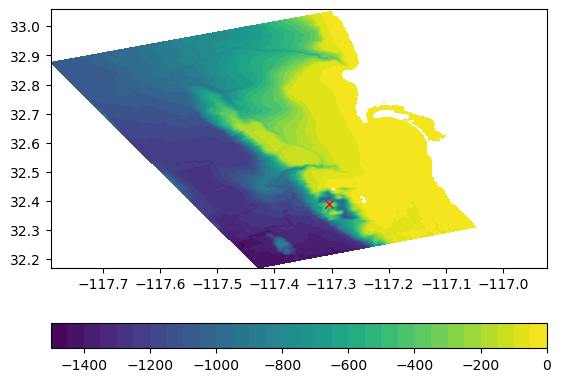

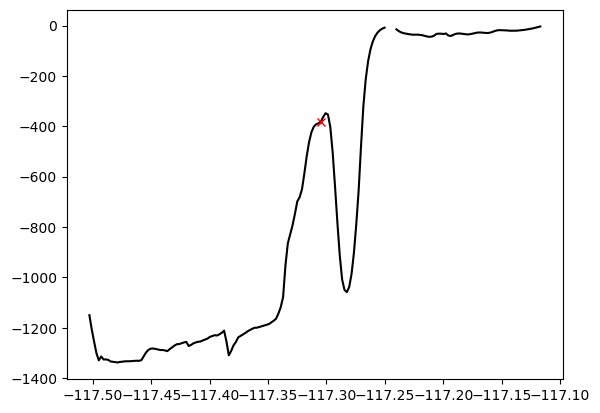

In [7]:
# this is the bad region in lv3
ix3 = 98
iy3 = 85
xx = grd3.variables['lon_rho'][:]
yy = grd3.variables['lat_rho'][:]
zz = -grd3.variables['h'][:]
msk = grd3.variables['mask_rho'][:]
zz[msk==0] = np.nan

fig, ax = plt.subplots()
p0=ax.contourf(xx,yy,zz,30)
p1=ax.plot(xx[iy3,ix3],yy[iy3,ix3],'rx')
fig.colorbar(p0, ax=ax,location='bottom')

fig, ax = plt.subplots()
p1=ax.plot(xx[iy3,:],zz[iy3,:],'k')
p2=ax.plot(xx[iy3,ix3],zz[iy3,ix3],'rx')


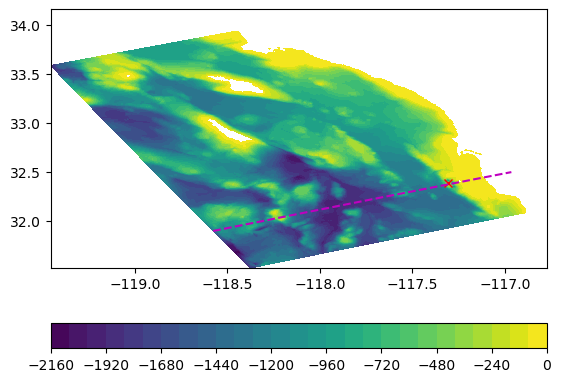

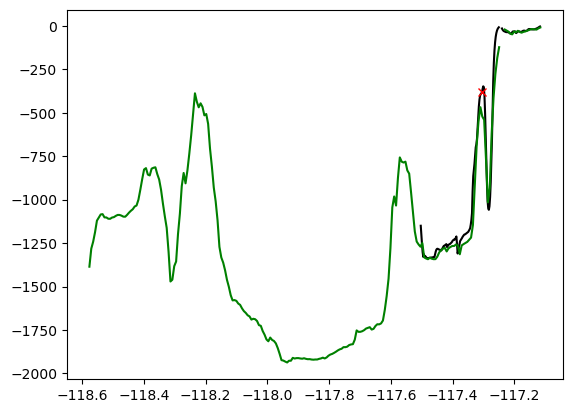

In [8]:

# LV2 map with bad LV3 spot
xx2 = grd2.variables['lon_rho'][:]
yy2 = grd2.variables['lat_rho'][:]
zz2 = -grd2.variables['h'][:]
msk2 = grd2.variables['mask_rho'][:]
zz2[msk2==0] = np.nan

fig, ax = plt.subplots()
p0=ax.contourf(xx2,yy2,zz2,30)
p1=ax.plot(xx[iy3,ix3],yy[iy3,ix3],'rx')
iy2 = 73
p2=ax.plot(xx2[iy2,:],yy2[iy2,:],'--m')
fig.colorbar(p0, ax=ax,location='bottom')

fig, ax = plt.subplots()
p1=ax.plot(xx[iy3,:],zz[iy3,:],'k')
p3=ax.plot(xx2[iy2,:],zz2[iy2,:],'g')
p2=ax.plot(xx[iy3,ix3],zz[iy3,ix3],'rx')


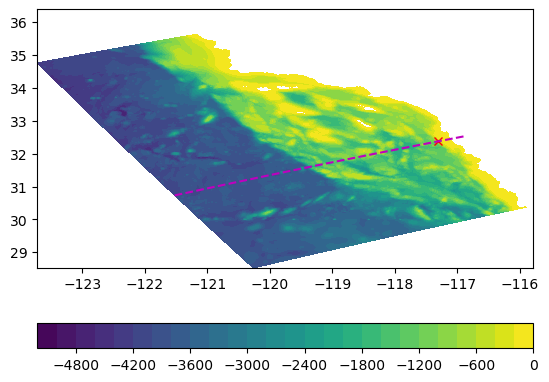

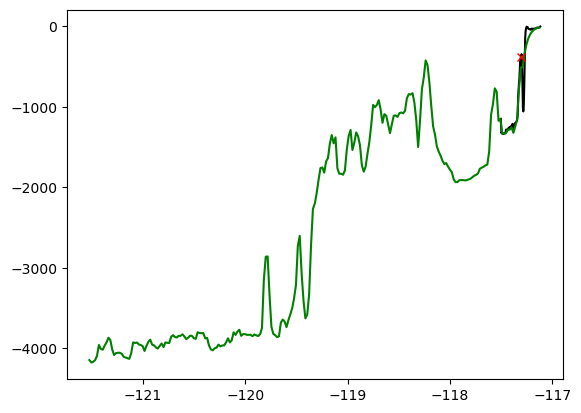

In [9]:
# LV1 map with bad LV3 spot
xx2 = grd1.variables['lon_rho'][:]
yy2 = grd1.variables['lat_rho'][:]
zz2 = -grd1.variables['h'][:]
msk2 = grd1.variables['mask_rho'][:]
zz2[msk2==0] = np.nan

fig, ax = plt.subplots()
p0=ax.contourf(xx2,yy2,zz2,30)
p1=ax.plot(xx[iy3,ix3],yy[iy3,ix3],'rx')
iy1 = 139
p2=ax.plot(xx2[iy1,:],yy2[iy1,:],'--m')
fig.colorbar(p0, ax=ax,location='bottom')

fig, ax = plt.subplots()
p1=ax.plot(xx[iy3,:],zz[iy3,:],'k')
p3=ax.plot(xx2[iy1,:],zz2[iy1,:],'g')
p2=ax.plot(xx[iy3,ix3],zz[iy3,ix3],'rx')



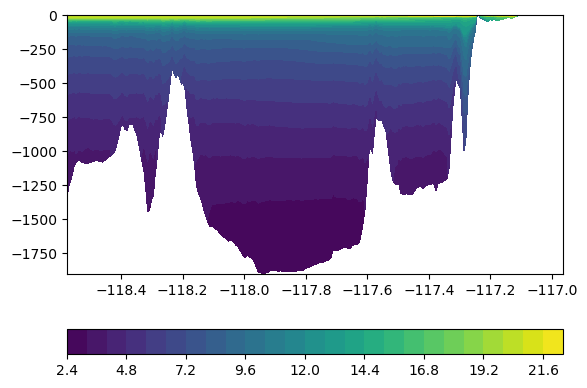

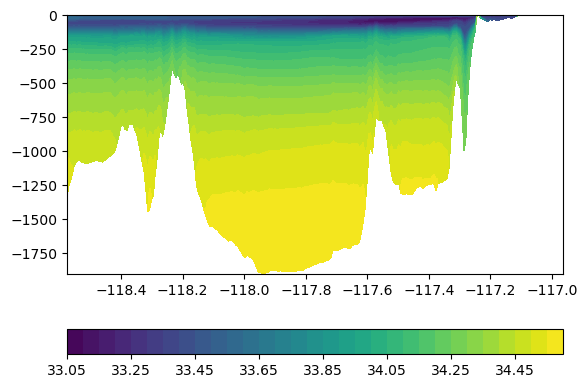

In [10]:

# previous IC.nc file. With weirdness near ridges and valleys
xx2 = np.tile( grd2.variables['lon_rho'][iy2,:],[40,1] )
yy2 = grd2.variables['lat_rho'][:]
zz2 = z2
vv2 = iclv2.variables['temp'][0,:,:,:]
msk2 = grd2.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


vv2 = iclv2.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')




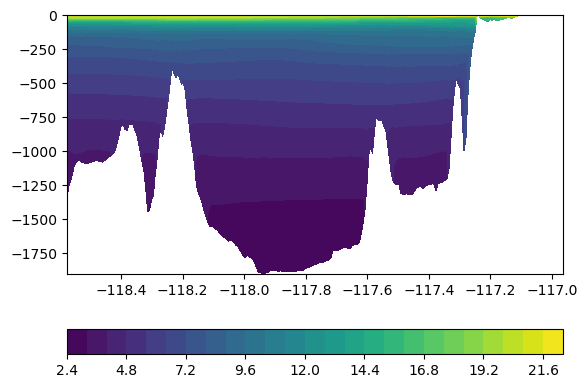

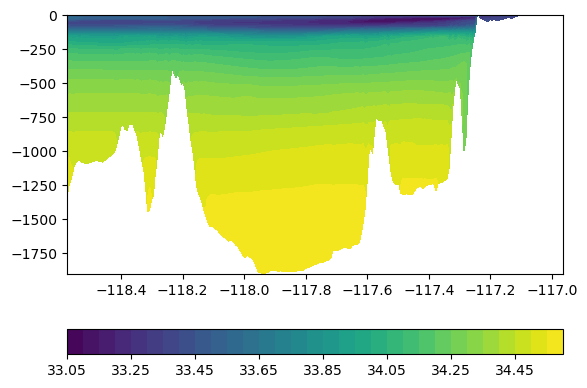

In [11]:

# new IC.nc file. no weirdness
xx2 = np.tile( grd2.variables['lon_rho'][iy2,:],[40,1] )
yy2 = grd2.variables['lat_rho'][:]
zz2 = z2
vv2 = iclv2_v2.variables['temp'][0,:,:,:]
msk2 = grd2.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


vv2 = iclv2_v2.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')




(-100.0, 5.0)

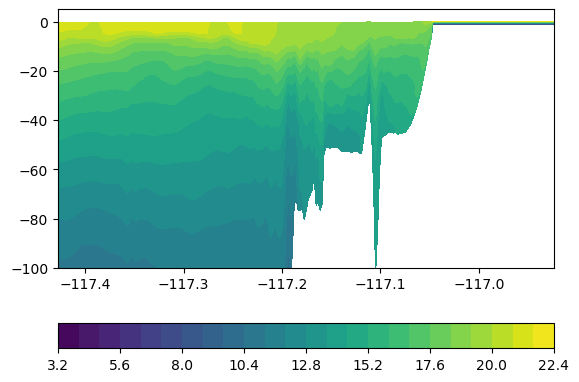

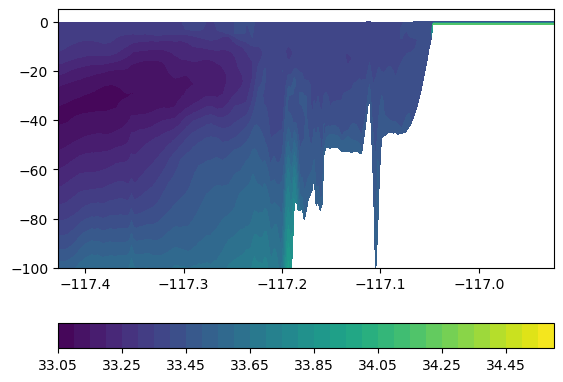

In [18]:

# old BC.nc file. weirdness
xx2 = np.tile( grd3.variables['lon_rho'][0,:],[40,1] )
zz2 = z3
vv2 = bclv3.variables['temp_south'][-1,:,:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])


vv2 = bclv3.variables['salt_south'][-1,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])



(-100.0, 5.0)

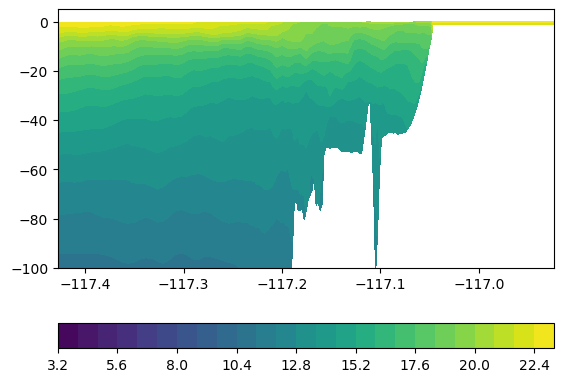

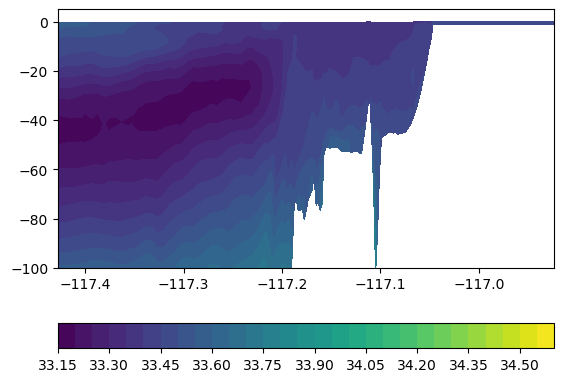

In [19]:


# new BC.nc file. no weirdness
xx2 = np.tile( grd3.variables['lon_rho'][0,:],[40,1] )
zz2 = z3
vv2 = bclv3_v2.variables['temp_south'][-1,:,:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])


vv2 = bclv3_v2.variables['salt_south'][-1,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])




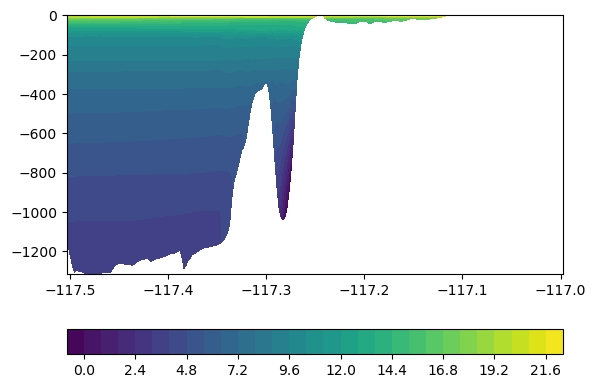

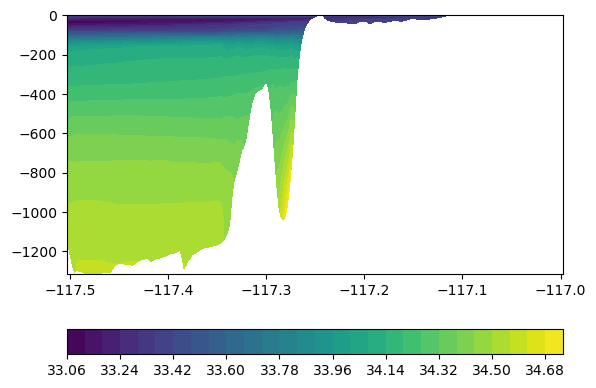

In [12]:
xx2 = np.tile( grd3.variables['lon_rho'][iy3,:],[40,1] )
yy2 = grd3.variables['lat_rho'][:]
zz2 = z3
vv2 = iclv3_v2.variables['temp'][0,:,:,:]
msk2 = grd3.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy3,:],vv2[:,iy3,:],30)
fig.colorbar(p0, ax=ax,location='bottom')

vv2 = iclv3_v2.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy3,:],vv2[:,iy3,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


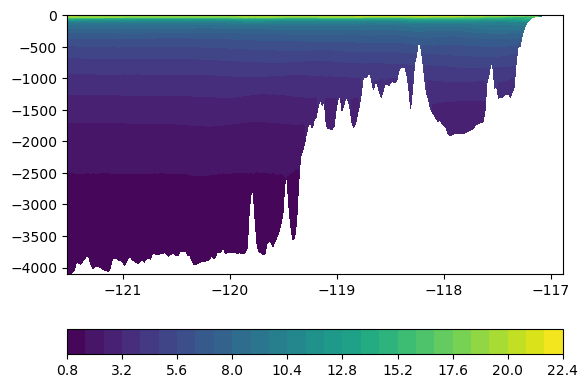

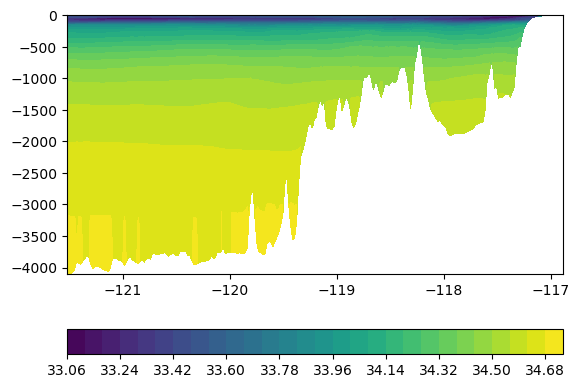

In [76]:
iy2 = 139
xx2 = np.tile( grd1.variables['lon_rho'][iy2,:],[40,1] )
yy2 = grd1.variables['lat_rho'][:]
zz2 = z1
vv2 = iclv1.variables['temp'][0,:,:,:]
msk2 = grd1.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


vv2 = iclv1.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


In [ ]:

varnm='temp_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
xx = np.tile( OCN_R['lon_rho'][0,:],[40,1] )
#print(xx)
#print(np.shape(xx))
yy = np.squeeze(Zrm['zr_bc_s'][0,:,:])
#print(yy)
#print(np.shape(yy))
zz = np.squeeze(np.squeeze(vv[0,:,:]))
#print(np.shape(zz))
#p0=ax.imshow(zz)
p0=ax.contourf(xx,yy,zz,plevs)
p1=ax.plot([-116.1,-115.85],[0,0],'--k')
p2=ax.plot(OCN_R['lon_rho'][0,:],1*msk[0,:],'ro')
p3=ax.plot(OCN_R['lon_rho'][0,:],OCN_R['zeta'][0,0,:],'b')
p3=ax.plot(OCN_R['lon_rho'][0,:],-0.01*hb[0,:],'c')


fig.colorbar(p0, ax=ax,location='bottom')
#ax.set_xlim([-116.1, -115.8])
#ax.set_ylim([-1,1])


(21, 40, 253)


(0.0, 250.0)

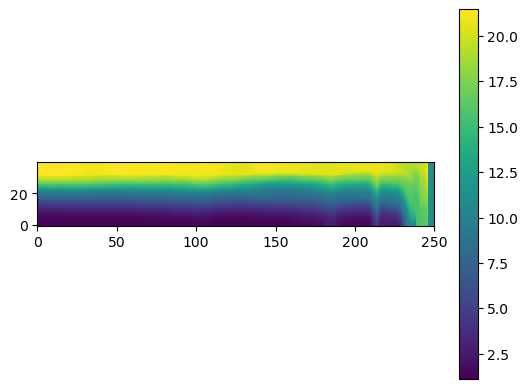

In [15]:
varnm='temp_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='right')
ax.set_xlim([0, 250])


(21, 40, 253)


(30.0, 40.0)

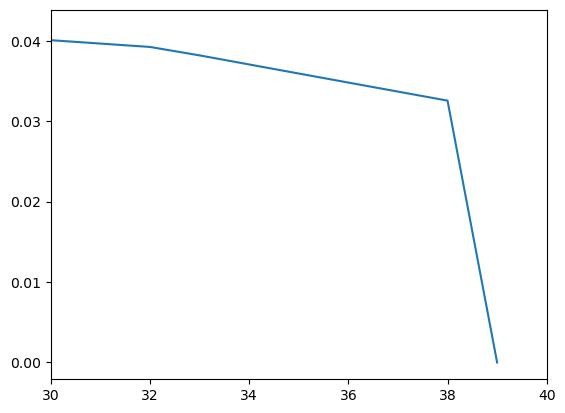

In [78]:
varnm='v_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.plot(vv[0,:,245])
ax.set_xlim([30, 40])


In [ ]:


varnm='temp'
vv=his.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,39,:,:], interpolation='none',origin='lower')
p1=ax.plot(41,106,'rx')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([200, 250])
ylm = [0,50] 
ax.set_ylim(ylm)


(1, 40, 413, 251)


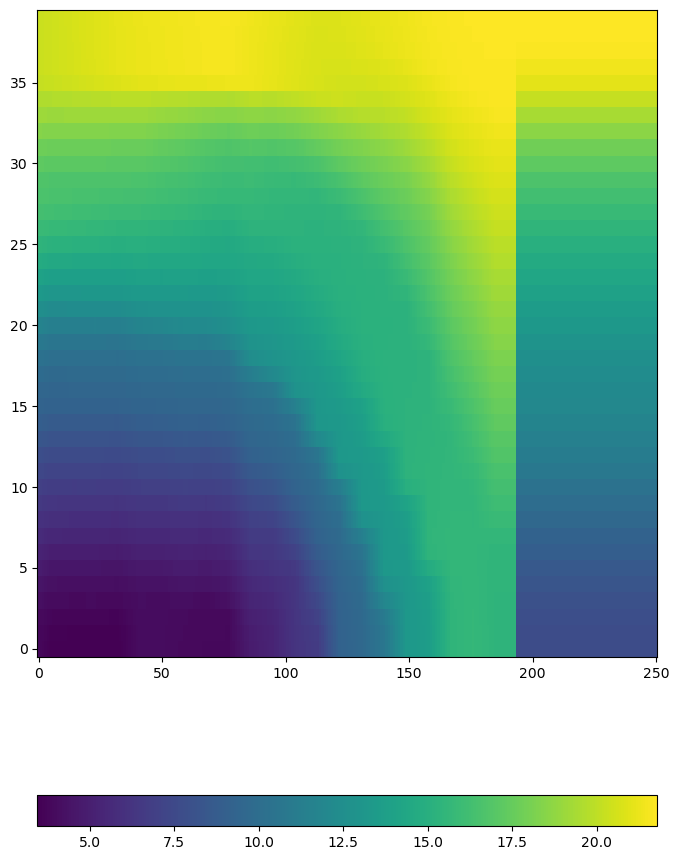

In [38]:
iy=97
varnm='temp'
vv=iclv3.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots(figsize=(8, 12))
vv2 = np.squeeze(vv[0,:,iy,:])
p0=ax.imshow(vv2, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='bottom')
#ax.set_xlim([0, 250])
ax.set_aspect('auto', adjustable='box')

#print(vv2[39,:])

(1, 413, 251)


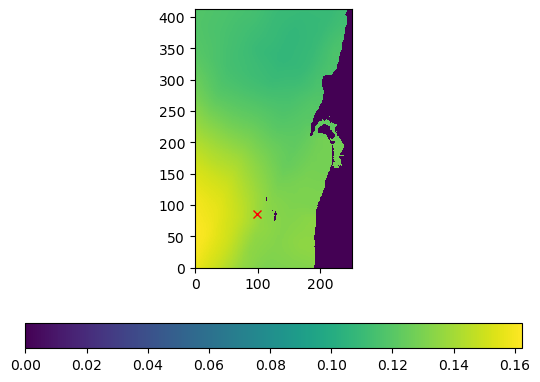

In [34]:
varnm='zeta'
vv=his.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,:,:], interpolation='none',origin='lower')
p1=ax.plot(98,85,'rx')
fig.colorbar(p0, ax=ax,location='bottom')
#ax.set_xlim([200, 250])
#ylm = [0,50] 
#ax.set_ylim(ylm)
#p0.set_clim(.06,.175)

(390, 253)


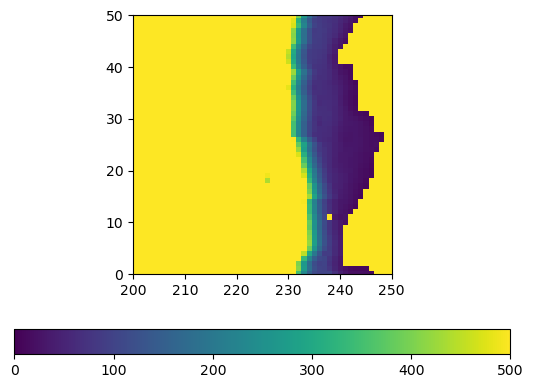

In [68]:

varnm='mask_rho'
vmsk = grd.variables[varnm][:]
varnm='h'
vv = grd.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
vv[vmsk==0]=1000
p0=ax.imshow(vv[:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([200, 250])
ylm = [0,50] 
ax.set_ylim(ylm)
p0.set_clim(0,500)

(21, 253)


(-0.1, 1.0)

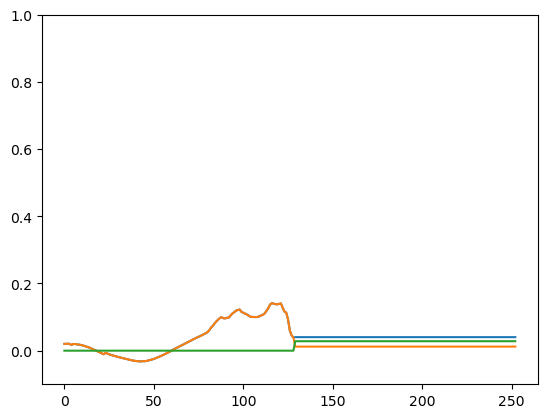

In [4]:
vv = bc1.variables['vbar_north'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

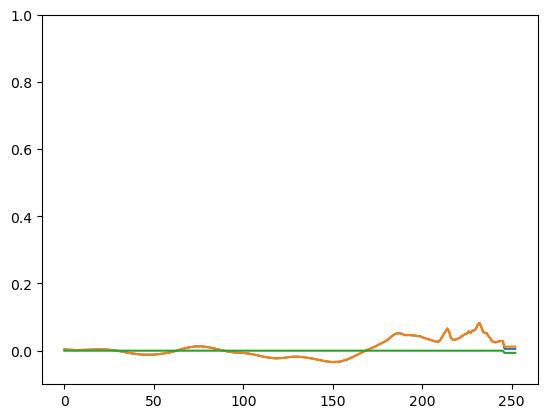

In [5]:
vv = bc1.variables['vbar_south'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 389)


(-0.1, 1.0)

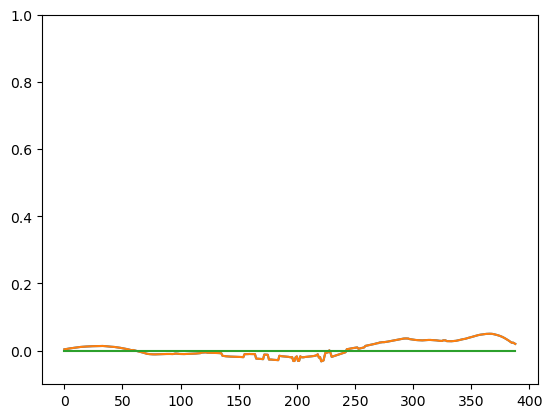

In [6]:
vv = bc1.variables['vbar_west'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

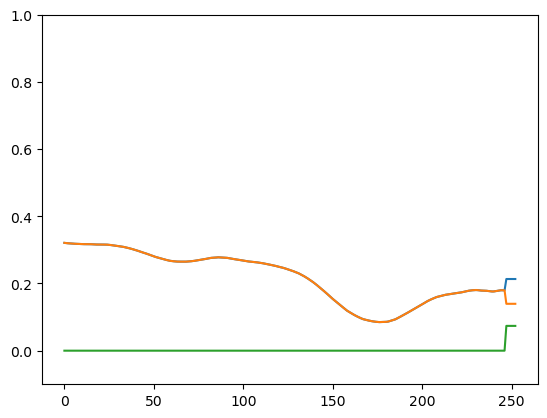

In [7]:
vv = bc1.variables['zeta_south'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

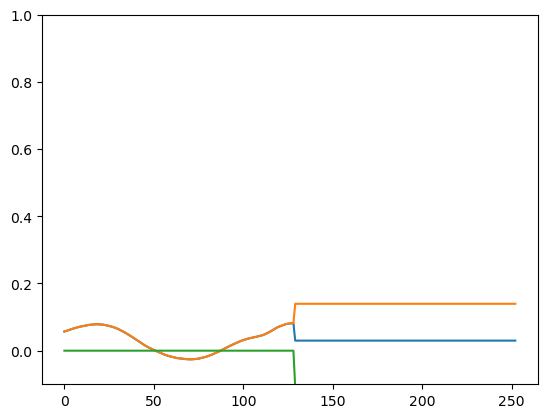

In [8]:
vv = bc1.variables['zeta_north'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 390)


(-0.1, 1.0)

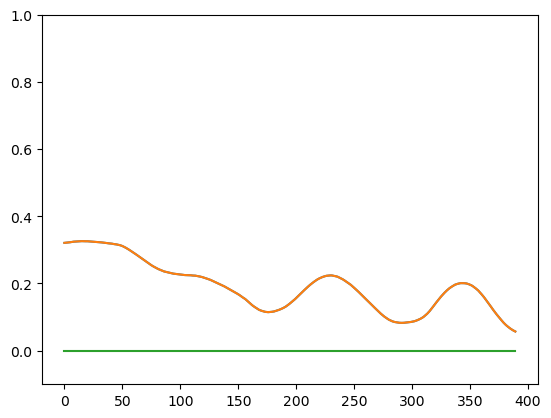

In [9]:
vv = bc1.variables['zeta_west'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 252)


(-0.1, 1.0)

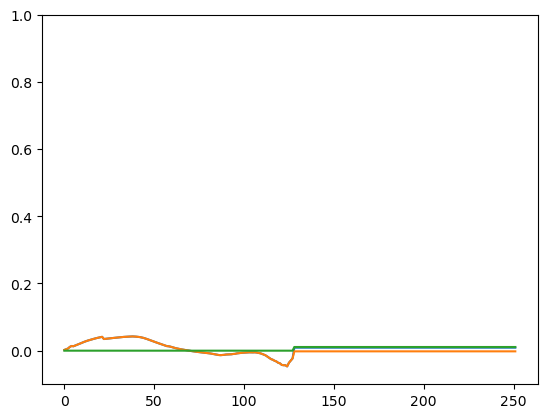

In [10]:
vv = bc1.variables['ubar_north'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 252)


(-0.1, 1.0)

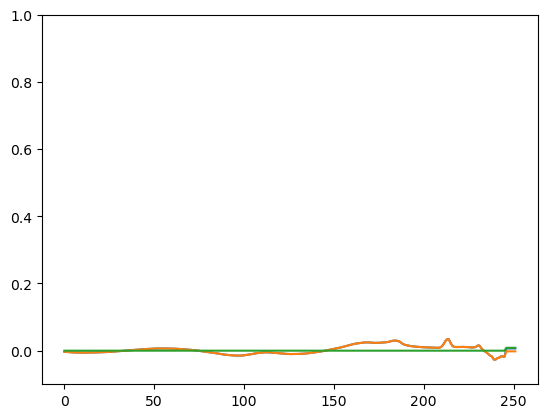

In [11]:
vv = bc1.variables['ubar_south'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 390)


(-0.1, 1.0)

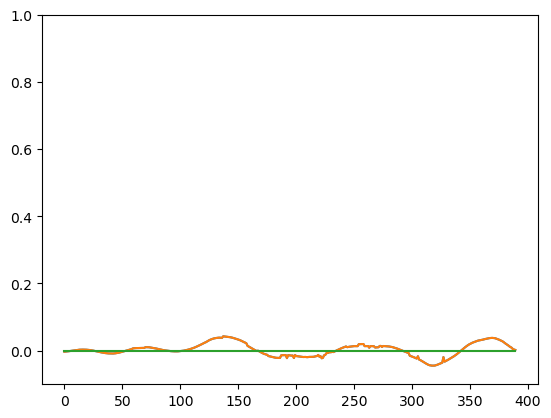

In [12]:
vv = bc1.variables['ubar_west'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-0.1, 30.0)

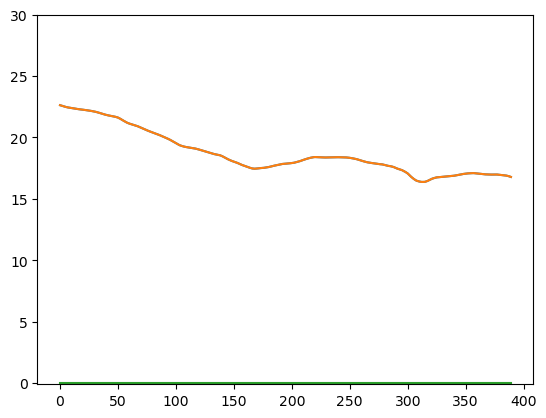

In [13]:
vv = bc1.variables['temp_west'][:]
v2 = ic1.variables['temp'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-.1, 30])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-0.1, 35.0)

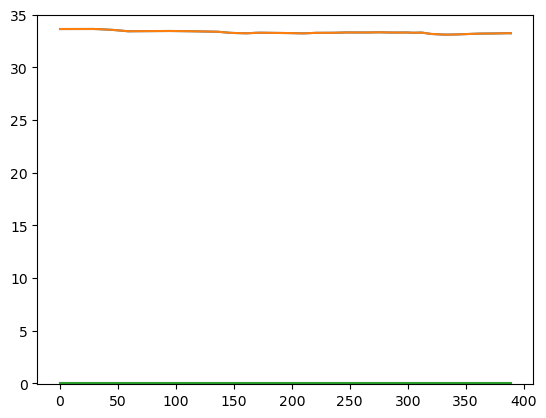

In [14]:
vv = bc1.variables['salt_west'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-.1, 35])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 389)


(-1.0, 1.0)

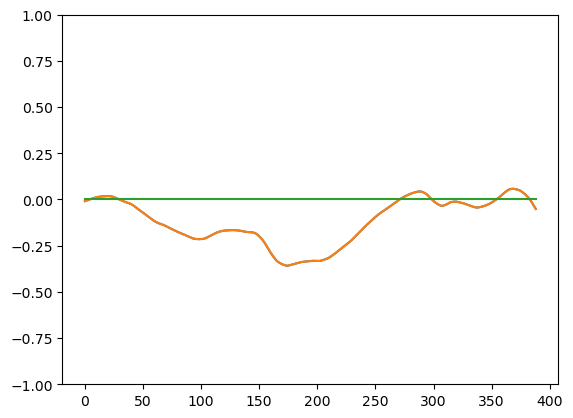

In [15]:
vv = bc1.variables['v_west'][:]
v2 = ic1.variables['v'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-1.0, 1.0)

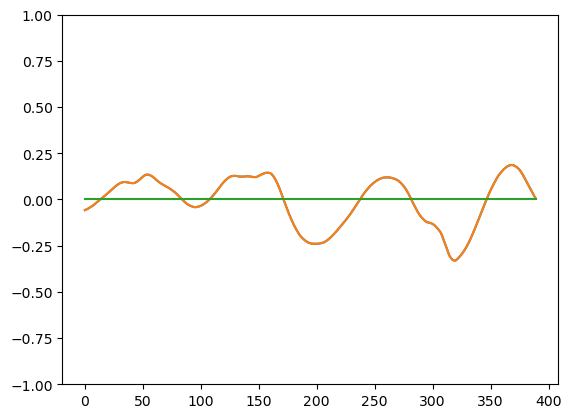

In [16]:
vv = bc1.variables['u_west'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')



(21, 40, 390)


(-1.0, 1.0)

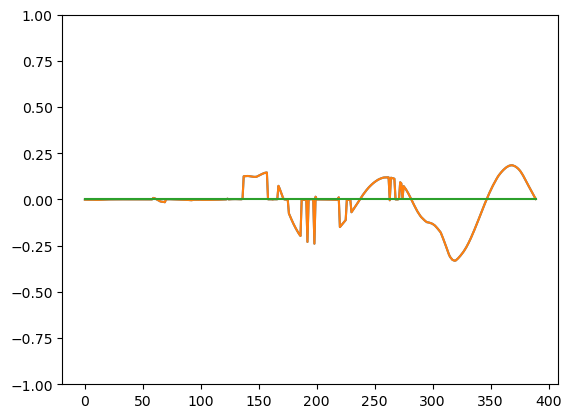

In [17]:
vv = bc1.variables['u_west'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,0,:])
p1=ax.plot(v2[0,0,:,0])
p3=ax.plot(vv[0,0,:]-v2[0,0,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 252)


(120.0, 130.0)

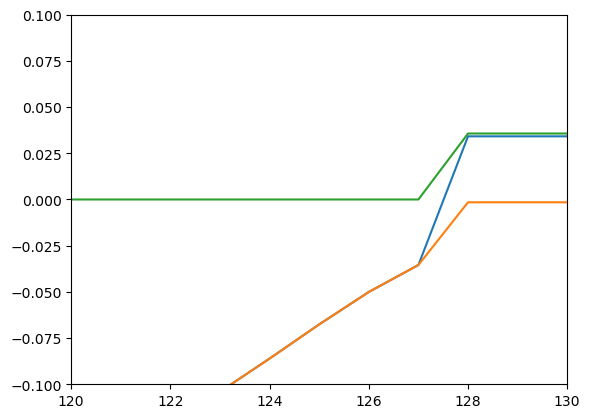

In [18]:
vv = bc1.variables['u_north'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([-.1, .1])
ax.set_xlim([120,130])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


(-1.0, 1.0)

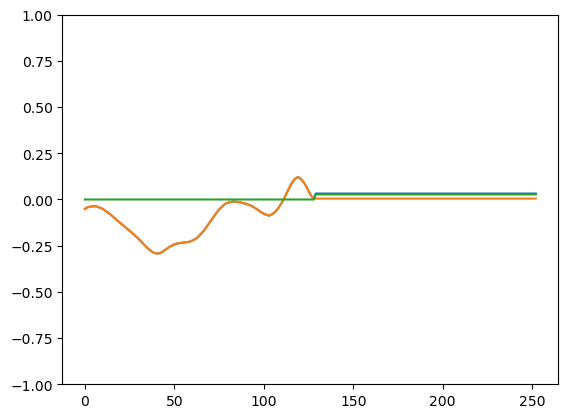

In [19]:
vv = bc1.variables['v_north'][:]
v2 = ic1.variables['v'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


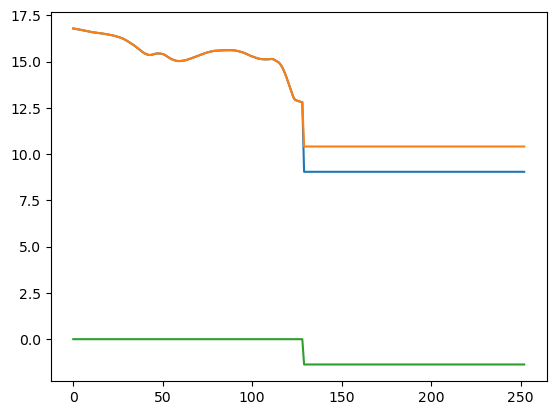

In [20]:
vv = bc1.variables['temp_north'][:]
v2 = ic1.variables['temp'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
#ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


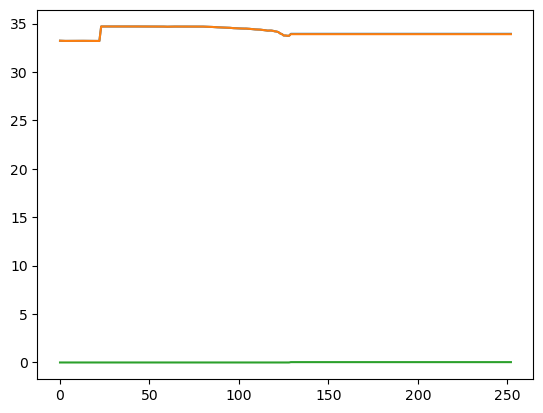

In [21]:
vv = bc1.variables['salt_north'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,0,:])
p1=ax.plot(v2[0,0,-1,:])
p3=ax.plot(vv[0,0,:]-v2[0,0,-1,:])
#ax.set_ylim([33, 34])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


In [ ]:
vv = bc1.variables['salt_north'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([33, 34])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')



In [ ]:

# this block of code shows that there are only NaNs on land
# for the boundary conditions file

vns = ['zeta','ubar','vbar','salt','temp','u','v']
grs = ['mask_rho','mask_u','mask_v','mask_rho','mask_rho','mask_u','mask_v']
eds = ['_north','_south','_west']
nzs = [1,1,1,40,40,40,40]
nt = 21
for aa in range(7):
    nz = nzs[aa]
    nn = nz*nt
    for bb in eds:
        mk = grd.variables[grs[aa]][:]
        vv = bc1.variables[vns[aa]+bb][:]
        #print(vns[aa] + bb)
        #print(np.shape(vv))
        if bb=='_north':
            mk=mk[-1,:]
        elif bb=='_south':
            mk=mk[0,:]
        elif bb=='_west':
            mk=mk[:,0]

        num_nan_0 = nn*np.sum( 1-mk )
        num_nan = np.count_nonzero( np.isnan( vv ))
        print('there should be ' + str(num_nan_0) + ' NaNs in ' + vns[aa]+bb)
        print('there are: ' + str(num_nan) +' NaNs\n')


In [25]:
# this block of code shows that there are only NaNs on land
# for the IC fields

vns = ['zeta','ubar','vbar','salt','temp','u','v']
grs = ['mask_rho','mask_u','mask_v','mask_rho','mask_rho','mask_u','mask_v']
nzs = [1,1,1,40,40,40,40]

cnt = 0
for aa in range(7):
    vv = ic1.variables[vns[aa]][:]
    mk = grd.variables[grs[aa]][:]
    nz = nzs[aa]
    if nz==40:
        vv2 = vv[0,:,:,:]
    else:
        vv2 = vv[0,:,:]
    num_nan_0 = nz*np.sum( 1-mk )
    num_nan = np.count_nonzero( np.isnan( vv2 ))
    print('there should be ' + str(num_nan_0) + ' NaNs in ' + vns[aa])
    print('there are: ' + str(num_nan) +' NaNs\n')


there should be 17453.0 NaNs in zeta
there are: 17453 NaNs

there should be 17538.0 NaNs in ubar
there are: 17538 NaNs

there should be 17593.0 NaNs in vbar
there are: 17593 NaNs

there should be 698120.0 NaNs in salt
there are: 698120 NaNs

there should be 698120.0 NaNs in temp
there are: 698120 NaNs

there should be 701520.0 NaNs in u
there are: 701520 NaNs

there should be 703720.0 NaNs in v
there are: 703720 NaNs



10.408486998054535
10.408486998054535
3946800
3946800
0.0


TypeError: Invalid shape (40, 390, 253) for image data

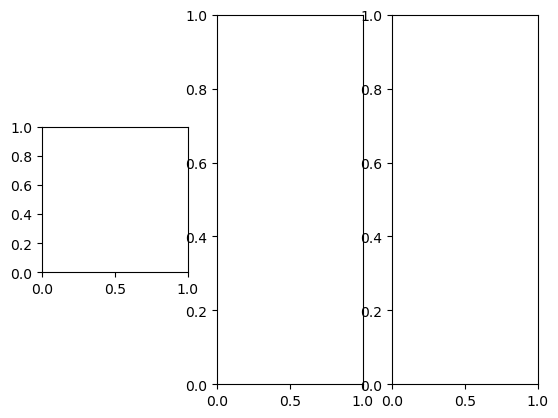

In [37]:


zeta = ic1.variables['temp'][:]
#print(grd.variables.keys())
mask_rho = grd.variables['mask_rho']



print(np.nanmean(zeta))
print(zeta.mean())

zeta2 = zeta.copy()
zeta2 = zeta2.filled(zeta2.mean())
inz = np.isnan(zeta)

print(np.count_nonzero(zeta))
print(np.count_nonzero(zeta2))

zg = np.ones(np.shape(zeta))
zg[inz] = 0

dn = zg[0,:,:] - mask_rho

print(np.sum(dn))

fig, ax = plt.subplots(nrows=1, ncols=3)
p0=ax[0].imshow(zg[0,:,:], interpolation='none',origin='lower')
p1=ax[1].imshow(mask_rho, interpolation='none',origin='lower')
p2=ax[2].imshow(dn, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
fig.colorbar(p2, ax=ax[2],location='bottom')
p0.set_clim(0,1)
p1.set_clim(0,1)
p2.set_clim(-.01,.01)

fig, ax = plt.subplots(nrows=1, ncols=2)
p0=ax[0].imshow(zeta[0,:,:], interpolation='none',origin='lower')
p1=ax[1].imshow(zeta2[0,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
#p0.set_clim(0,1)
#p1.set_clim(0,1)



In [ ]:


tic1 = ic1.variables['ocean_time']
tic2 = ic2.variables['ocean_time']

print(ic1.variables.keys())
print(ic2.variables.keys())

u1 = ic1.variables['u']
u2 = ic2.variables['u']
v1 = ic1.variables['v']
v2 = ic2.variables['v']
temp1 = ic1.variables['temp']
temp2 = ic2.variables['temp']
s1 = ic1.variables['salt']
s2 = ic2.variables['salt']
e1 = ic1.variables['zeta']
e2 = ic2.variables['zeta']

u10=u1[:]
u20=u2[:]
v10=v1[:]
v20=v2[:]
t10=temp1[:]
t20=temp2[:]
s10=s1[:]
s20=s2[:]
e10=e1[:]
e20=e2[:]

print(np.shape(u10))
print(np.shape(u20))

u1s = np.squeeze(u10[0,39,:,:])
u2s = np.squeeze(u20[0,0,39,:,:])
v1s = np.squeeze(v10[0,39,:,:])
v2s = np.squeeze(v20[0,0,39,:,:])
t1s = np.squeeze(t10[0,39,:,:])
t2s = np.squeeze(t20[0,0,39,:,:])
s1s = np.squeeze(s10[0,39,:,:])
s2s = np.squeeze(s20[0,0,39,:,:])
e1s = np.squeeze(e10[0,:,:])
e2s = np.squeeze(e20[0,0,:,:])

print(np.shape(e1s))
print(np.shape(e2s))

print(np.count_nonzero(np.isnan(u1s)))
print(np.count_nonzero(np.isnan(u2s)))
print(np.count_nonzero(np.isnan(v1s)))
print(np.count_nonzero(np.isnan(v2s)))
print(np.count_nonzero(np.isnan(t1s)))
print(np.count_nonzero(np.isnan(t2s)))
print(np.count_nonzero(np.isnan(s1s)))
print(np.count_nonzero(np.isnan(s2s)))
print(np.count_nonzero(np.isnan(e1s)))
print(np.count_nonzero(np.isnan(e2s)))


print(np.nanmean(u1s))
print(np.nanmean(u2s))
print(np.nanmean(v1s))
print(np.nanmean(v2s))

print(u1s[0,-2:])
print(u2s[0,-2:])

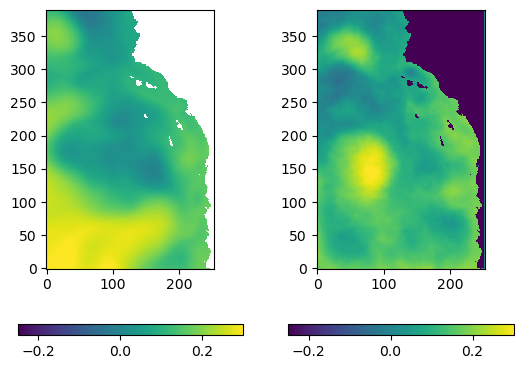

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2)

p0=ax[0].imshow(e1s, interpolation='none',origin='lower')
p1=ax[1].imshow(e2s, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
p0.set_clim(-.25,.3)
p1.set_clim(-.25,.3)

In [63]:
a1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')
a2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/roms_nam_LV1_20181216_20190115.nc')
#print(a1.variables.keys())
#print(a2.variables.keys())
tf1 = a1.variables['ocean_time']
tf2 = a2.variables['ocean_time']

tt1 = netCDF4.num2date(tf1[:],tf1.units)
tt2 = netCDF4.num2date(tf2[:],tf2.units)
print(tt1)
print(tt2)



ValueError: Unable to parse date string 'tref'

: 